## Part 1- Polynomial Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
x = 6*np.random.rand(200,1) -3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200,1)

# This is just dummy data to check whether the data is good at simple linear regression or polynomial linear regression

In [3]:
y

array([[ 1.44374643],
       [ 9.35382234],
       [ 3.20645981],
       [ 2.47927026],
       [13.14497564],
       [ 9.75359825],
       [ 1.91248714],
       [ 4.01780528],
       [ 7.0016513 ],
       [ 1.01800071],
       [ 2.82150645],
       [ 5.02921917],
       [ 6.02136662],
       [ 5.47778571],
       [ 2.70178459],
       [ 2.27442059],
       [ 2.12490467],
       [11.900381  ],
       [ 4.86374567],
       [11.38888887],
       [10.11882451],
       [ 3.58986843],
       [ 4.64284528],
       [ 7.77236516],
       [ 3.43058265],
       [ 2.92550607],
       [ 9.73725483],
       [ 2.7165357 ],
       [ 5.22691791],
       [ 1.21786103],
       [10.12223035],
       [ 1.99881539],
       [ 6.82782867],
       [ 1.44321234],
       [ 3.85877458],
       [ 1.25638648],
       [10.28518287],
       [ 3.72663047],
       [ 2.98492112],
       [ 3.72957557],
       [ 0.6981582 ],
       [ 6.09436685],
       [ 5.13946834],
       [12.72837674],
       [ 4.19209991],
       [ 4

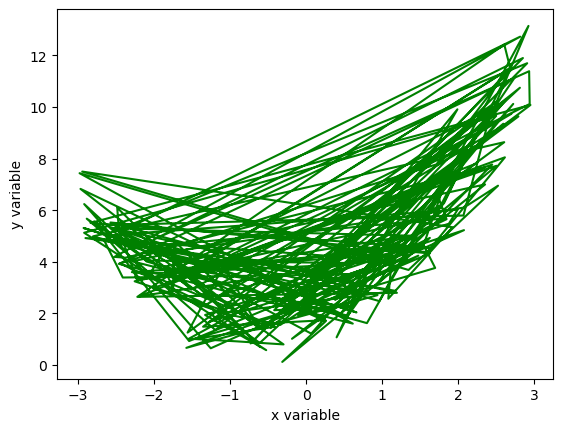

In [4]:
plt.plot(x,y,'g') # 'g' is a colour
plt.xlabel("x variable")
plt.ylabel("y variable")
plt.show()

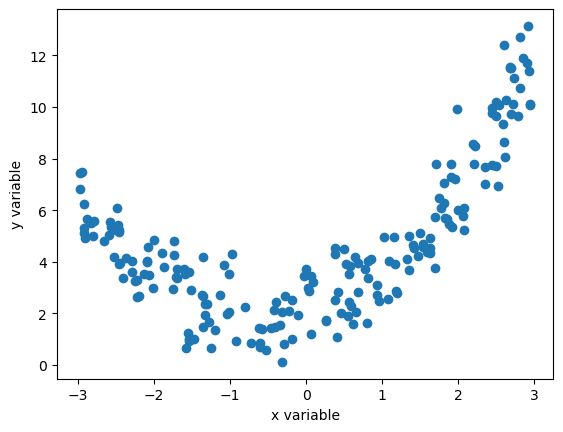

In [5]:
plt.scatter(x=x,y=y)
plt.xlabel("x variable")
plt.ylabel("y variable")
plt.show()

In [6]:
# the above is the acutal plot 

In [7]:
# split the data into train and test split

x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = 0.3, random_state = 1)

In [8]:
# apply linear regression model

linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred_train = linear.predict(x_train)
y_pred_test = linear.predict(x_test)

In [10]:
# Evaluate the model

print(r2_score(y_train,y_pred_train))
print()
print(r2_score(y_test,y_pred_test))


0.3188647656591307

0.2756241135374643


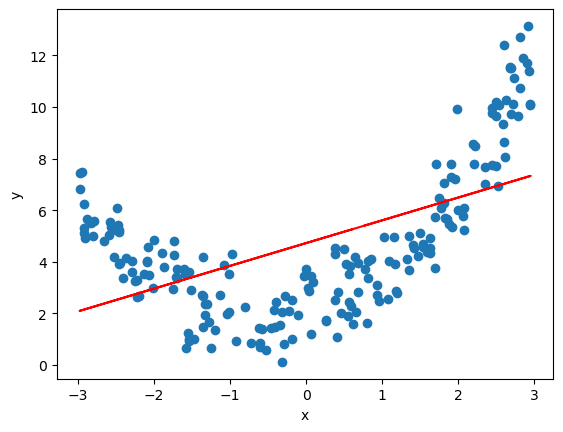

In [11]:
plt.scatter(x=x,y=y)
plt.plot(x_train,y_pred_train,color = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [12]:
# the above is the actual vs predicted and the red line is best fit line(predicted line),
# anything below is underfit (or by seeing x_train =0.36,y_pred_train=0.4)

## Applying Polynomial Linear Regression method with degree = 2

In [13]:
# When we don't get good accuracy in simple linear regression, we use polynomial linear regression

In [14]:
poly = PolynomialFeatures(degree = 2, include_bias = True) 
# bias = intercept, # degree =2 => (y=8 to y=0) & (y=0 to y=13) total=2
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.fit_transform(x_test)

In [15]:
# build polynomial linear regression

linear_1 = LinearRegression()
linear_1.fit(x_train_trans, y_train)

LinearRegression()

In [16]:
# predict 

y_pred_train_ply = linear_1.predict(x_train_trans)
y_pred_test_ply = linear_1.predict(x_test_trans)

In [17]:
# Evaluate the model

print(r2_score(y_train,y_pred_train_ply))
print()
print(r2_score(y_test,y_pred_test_ply))

0.88111728709565

0.8527189287231761


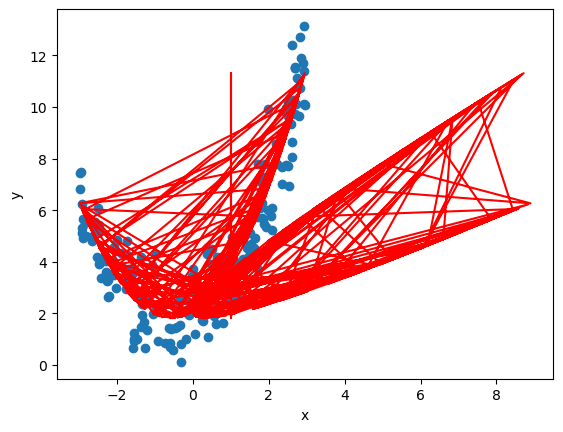

In [18]:
plt.scatter(x=x,y=y)
plt.plot(x_train_trans,y_pred_train_ply,color = "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Case 2 -Regularization Approach

In [19]:
mpg_df = pd.read_csv("D:\Learnbay\Stats & ML by Kumar Sundaram Sir\Documents\ML\mpg.csv")
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [20]:
mpg_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [21]:
mpg_df['origin'] = mpg_df['origin'].replace({1:"america",2:"europe",3:"asia"})
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,america,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,america,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,america,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,america,ford torino


In [22]:
mpg_df =pd.get_dummies(mpg_df,columns = ['origin'])

In [23]:
mpg_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,vw pickup,0,0,1
395,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


In [24]:
mpg_df['name'].nunique()

305

In [25]:
mpg_df = mpg_df.drop(['name','origin_america'],axis = 1)

In [26]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


In [27]:
mpg_df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model_year       0
origin_asia      0
origin_europe    0
dtype: int64

In [28]:
# AS mpg_df.isnull() is showing no null values,but we confirm after seeing unique values in each column

for i in mpg_df.columns:
    print("*******************************************************",i,
                                "****************************************")
    print()
    print(set(mpg_df[i].tolist()))
    print()

******************************************************* mpg ****************************************

{9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.5, 27.5, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 29.5, 35.0, 31.5, 36.0, 33.5, 36.1, 39.4, 43.1, 35.7, 37.3, 41.5, 38.1, 46.6, 40.8, 44.3, 43.4, 44.6, 44.0, 14.5, 15.5, 16.5, 16.9, 17.5, 17.6, 18.5, 18.6, 18.1, 19.9, 19.4, 19.1, 20.5, 20.6, 21.5, 21.1, 21.6, 22.5, 22.4, 23.9, 23.6, 23.5, 24.5, 25.4, 25.1, 25.5, 26.4, 26.6, 27.4, 27.9, 28.4, 28.1, 29.9, 30.5, 30.9, 31.9, 31.6, 32.8, 32.1, 32.2, 32.7, 32.4, 33.8, 32.3, 33.7, 32.9, 34.1, 34.2, 34.5, 34.3, 34.7, 35.1, 34.4, 34.0, 36.4, 37.2, 37.0, 37.7, 38.0, 39.1, 39.0, 40.9, 16.2, 17.7, 18.2, 19.2, 19.8, 20.2, 20.8, 20.3, 22.3, 23.2, 23.8, 23.7, 24.3, 24.2, 25.8, 26.8, 27.2, 28.8, 29.8, 30.7, 31.8, 31.3}

******************************************************* cylinders ****************************************

{3, 4, 5, 6, 8}

In [29]:
# there is a question mark in horse power, so the answer that we get from isnull()
  # is only for null or not, it don't observe anything else

In [32]:
mpg_df = mpg_df.replace('?',np.nan)

In [33]:
# coverting horsepower object type to horsepower numeric type

mpg_df['horsepower']= pd.to_numeric(mpg_df['horsepower'])

In [34]:
mpg_df['horsepower'].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [35]:
mpg_df.isnull().sum()


mpg              0
cylinders        0
displacement     0
horsepower       6
weight           0
acceleration     0
model_year       0
origin_asia      0
origin_europe    0
dtype: int64

In [36]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mpg            398 non-null    float64
 1   cylinders      398 non-null    int64  
 2   displacement   398 non-null    float64
 3   horsepower     392 non-null    float64
 4   weight         398 non-null    int64  
 5   acceleration   398 non-null    float64
 6   model_year     398 non-null    int64  
 7   origin_asia    398 non-null    uint8  
 8   origin_europe  398 non-null    uint8  
dtypes: float64(4), int64(3), uint8(2)
memory usage: 22.7 KB


<AxesSubplot:ylabel='horsepower'>

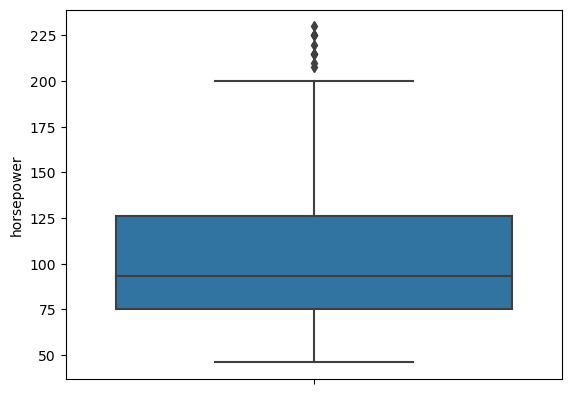

In [37]:
sns.boxplot(y = mpg_df['horsepower'], data =mpg_df)

In [38]:
mpg_df['horsepower'] = mpg_df['horsepower'].fillna(mpg_df['horsepower'].median())

In [39]:
mpg_df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       0
weight           0
acceleration     0
model_year       0
origin_asia      0
origin_europe    0
dtype: int64

In [41]:
# Split the data into x and y
mpg_df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin_asia', 'origin_europe'],
      dtype='object')

In [47]:
x = mpg_df.drop('mpg',axis = 1)
y = mpg_df[['mpg']]

In [49]:
x.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,0,0
1,8,350.0,165.0,3693,11.5,70,0,0
2,8,318.0,150.0,3436,11.0,70,0,0
3,8,304.0,150.0,3433,12.0,70,0,0
4,8,302.0,140.0,3449,10.5,70,0,0


In [50]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [52]:
# Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler = pd.DataFrame(x_scaler,columns = x.columns)
x_scaler.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.497643,-0.461968


In [61]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size =0.25, random_state = 2)


In [62]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(298, 8) (100, 8) (298, 1) (100, 1)


In [63]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y, random_state = 2)

#it means if we don't mention test_size automatically python takes as 25%

In [64]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(298, 8) (100, 8) (298, 1) (100, 1)


## Fit the Linear Regression Model

In [55]:
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name,regression_model.coef_[0][idx]))

The coefficient for cylinders is -1.1222047695874908
The coefficient for displacement is 3.3161559758654726
The coefficient for horsepower is -0.9830032614504651
The coefficient for weight is -5.940829257647759
The coefficient for acceleration is 0.13986472671490585
The coefficient for model_year is 2.846321725434406
The coefficient for origin_asia is 1.0459970230639621
The coefficient for origin_europe is 1.2522091663008028


In [60]:
# we can write the above code as mentioned below
regression_model.coef_

array([[-1.12220477,  3.31615598, -0.98300326, -5.94082926,  0.13986473,
         2.84632173,  1.04599702,  1.25220917]])

In [66]:
regression_model.intercept_

array([23.38114617])

## part 1 - Regularization: LASSO Model and it's Coefficient

In [76]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1 )
lasso.fit(x_train,y_train)
print("Lasso Coefficient:",lasso.coef_)

Lasso Coefficient: [-0.          0.         -0.4070251  -4.69410796  0.          2.63344925
  0.62063928  0.76494147]


## part 2 - Regularization: Ridge Model and it's Coefficient

In [92]:
from sklearn.linear_model import Ridge
ridge =Ridge(alpha =0.3)
ridge.fit(x_train,y_train)
print("Ridge Coefficient:",ridge.coef_)

Ridge Coefficient: [[-1.07894685  3.16612627 -0.99160727 -5.84538306  0.12364257  2.83529029
   1.03651229  1.2370243 ]]


In [80]:
regression_model.coef_

array([[-1.12220477,  3.31615598, -0.98300326, -5.94082926,  0.13986473,
         2.84632173,  1.04599702,  1.25220917]])

In [98]:
from sklearn.linear_model import ElasticNet 
elastic = ElasticNet(alpha =0.1,l1_ratio = 0.3)
elastic.fit(x_train,y_train)


ElasticNet(alpha=0.1, l1_ratio=0.3)

## Compare Accuracy

In [99]:
y_pred_train_lr = regression_model.predict(x_train)
y_pred_test_lr = regression_model.predict(x_test)

y_pred_train_lasso = lasso.predict(x_train)
y_pred_test_lasso = lasso.predict(x_test)

y_pred_train_ridge = ridge.predict(x_train)
y_pred_test_ridge = ridge.predict(x_test)

y_pred_train_el = elastic.predict(x_train)
y_pred_test_el = elastic.predict(x_test)

In [100]:
print("Linear Regression Training:", r2_score(y_train,y_pred_train_lr))
print()
print("Linear Regression Testing:", r2_score(y_test,y_pred_test_lr))

print()

print("Lasso Training:", r2_score(y_train,y_pred_train_lasso))
print()
print("Lasso Testing:", r2_score(y_test,y_pred_test_lasso))

print()

print("Ridge Training:", r2_score(y_train,y_pred_train_ridge))
print()
print("Ridge Testing:", r2_score(y_test,y_pred_test_ridge))

print()

print("ElasticNet Training:", r2_score(y_train,y_pred_train_el))
print()
print("ElasticNet Testing:", r2_score(y_test,y_pred_test_el))

Linear Regression Training: 0.809879596644161

Linear Regression Testing: 0.8564835957286592

Lasso Training: 0.8016770597561529

Lasso Testing: 0.8588117365773466

Ridge Training: 0.8098605896582229

Ridge Testing: 0.8569528879357781

ElasticNet Training: 0.7971473336585453

ElasticNet Testing: 0.8473719197732293
